<a href="https://colab.research.google.com/github/rodrigohaddad/RNSP/blob/main/t1/t1_kmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wisardpkg
!git clone https://github.com/rois-codh/kmnist.git
!python /content/kmnist/download_data.py

     |████████████████████████████████| 133kB 25.7MB/s 
     |████████████████████████████████| 194kB 33.8MB/s 
  ERROR: Failed building wheel for wisardpkg
  Running setup.py clean for wisardpkg
Failed to build wisardpkg
    Running setup.py install for wisardpkg ... done
Cloning into 'kmnist'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 211 (delta 0), reused 0 (delta 0), pack-reused 208
Receiving objects: 100% (211/211), 408.40 KiB | 31.42 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> 1
Please select a download option:
1) MNIST data format (ubyte.gz)
2) NumPy data format (.npz)
> 2
100% 17954/17954 [00:03<00:00, 5963.58KB/s]
100% 30/30 [00:00<00:00, 200.35KB/s]
100% 3008/3008 [00:01<0

In [4]:
import wisardpkg as wp

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
def load(f):
    return np.load(f)['arr_0']

# Load the data
imgs = {'x_train': load('kmnist-train-imgs.npz'),
        'x_test': load('kmnist-test-imgs.npz')}

labels = {'y_train': [str(i) for i in load('kmnist-train-labels.npz')],
          'y_test': [str(i) for i in load('kmnist-test-labels.npz')]}

In [ ]:
def sample_digit(target, X=imgs['x_train'], y=labels['y_train']):
    return next((digit for (digit, label) in zip(X, y) if label == str(target))).reshape((28,28))

def display_mnist_digits():
    fig, axs = plt.subplots(2, 5)
    
    for i in range(2):
        for j in range(5):
            axs[i, j].imshow(sample_digit(5*i + j), cmap="gray")
            axs[i, j].axes.xaxis.set_visible(False)
            axs[i, j].axes.yaxis.set_visible(False)
  
    return fig

display_mnist_digits();

In [ ]:
class BinarizeKmnist():
  def standard_bin(self, obj):
    bin = dict()
    for key, value in obj.items():
      bin[key] = [np.where(xis<128, 0, 1).flatten() for xis in value]
    return bin

binarize = BinarizeKmnist()
imgs_bin = binarize.standard_bin(imgs)

In [ ]:
model_info_kmnist = wp.Wisard(20)
model_info_kmnist.train(imgs_bin['x_train'], labels['y_train'])
y_pred = model_info_kmnist.classify(imgs_bin['x_test'])
accuracy_score(labels['y_test'], y_pred)

0.7359

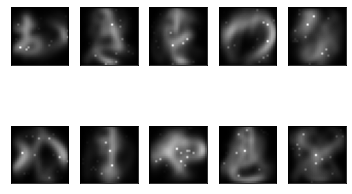

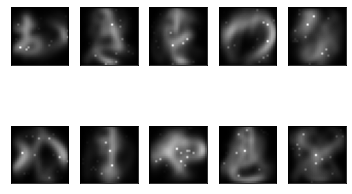

In [ ]:
def display_digits(images):
  fig, axs = plt.subplots(2, 5, squeeze=True)

  for i, img in enumerate(images.values()):
    img = np.reshape(img, (28, 28))
    img = img/np.max(img)
    fig.axes[i].imshow(img, cmap="gray", vmin=0., vmax=1.)
    fig.axes[i].xaxis.set_visible(False)
    fig.axes[i].yaxis.set_visible(False)

  return fig
  
display_digits(model_info_kmnist.getMentalImages())

In [8]:
wp.SimpleThermometer(1,1,1)

AttributeError: ignored